In [1]:
!pip install Bio
!pip install biopython
!pip install muscle

Enter the path to the FASTA file:  Phylogenetic_Tree_Construction.fasta


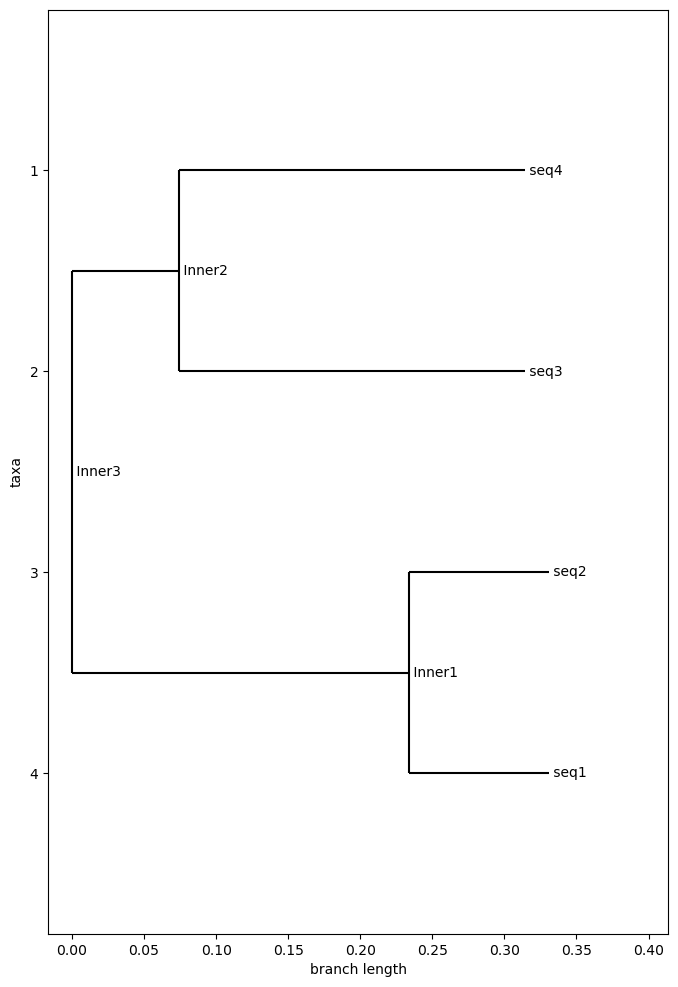

In [4]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
import matplotlib.pyplot as plt

# Enter the path to the FASTA file
fasta_file = input("Enter the path to the FASTA file: ")

# Read the sequences from the FASTA file
sequences = []
max_length = 0
for record in SeqIO.parse(fasta_file, "fasta"):
    sequence = str(record.seq)
    sequences.append(sequence)
    max_length = max(max_length, len(sequence))

# Pad or truncate sequences to the length of the longest sequence
aligned_sequences = []
for sequence in sequences:
    aligned_sequence = sequence.ljust(max_length, "-")
    aligned_sequences.append(aligned_sequence)

# Create SeqRecord objects for each sequence with unique identifiers
records = [SeqRecord(Seq(seq), id=f"seq{i+1}") for i, seq in enumerate(aligned_sequences)]

# Create a MultipleSeqAlignment object
alignment = MultipleSeqAlignment(records)

# Calculate distances
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Build the tree with branch lengths representing alignment differences
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)
for clade in tree.find_clades():
    if clade.branch_length is not None:
        clade.branch_length *= (1 - clade.branch_length)

# Save the tree in Newick format
Phylo.write(tree, "Phylogenetic_Tree_Construction.nwk", "newick")

# Visualize the tree
fig, ax = plt.subplots(figsize=(8, 12))
Phylo.draw(tree, axes=ax)
plt.title('Phylogenetic Tree')
plt.savefig('Phylogenetic_Tree_Construction.png')
plt.close()  # Close the figure